In [2]:
# import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches


## factory model

In [2]:
Num=20
Deposits=[20]*Num


Salary=[10]*Num

Consume=[9]*Num


Invest=[Deposits[i]-Consume[i] for i in range(Num)]

Factory={'cash':0,'earning':0.0}
Factory['cash'] += np.sum(Invest)

Factory['earning']+=0.1*Factory['cash']



In [134]:
np.sort(factory_gen(np.random.rand(20),20,1000,1))

array([6.74681119e+37, 2.77147166e+38, 1.16198406e+39, 1.30916949e+39,
       1.44959344e+39, 2.34643150e+39, 3.42199882e+39, 3.76073789e+39,
       4.14829763e+39, 4.69345363e+39, 5.76623820e+39, 5.84432472e+39,
       6.45335299e+39, 7.55629632e+39, 7.71796990e+39, 7.85636770e+39,
       7.91029814e+39, 8.18736994e+39, 8.51498785e+39, 8.78276629e+39])

In [7]:
D=np.ones(Num)*2
D=np.random.rand(Num)

def factory_gen(D,Num,days=100,exp=1,back=True):
    S=np.ones(Num)
    C=np.ones(Num)
    midx=np.where(D==np.min(D))
    cash_s=[]
    ds=[]
    I=D+S-C

    cash=0+I.sum()
    netR=cash*0.1

    R=netR*0.5*I/I.sum()
    cash+=netR*0.5
    cash_s+=[cash]
    ds.append(D[midx[0]])
    for day in range(days):
        add=S-C+R
        D+=add
        I=D

        # cash+=I.sum()
        cash+=(add).sum()
        netR=cash*0.1
        R=netR*0.5*I**exp/(I**exp).sum()
        # R=netR*0.5*I**2/(I**2).sum()
        # R=netR*0.5*I/(I).sum()
        cash+=netR*0.5

        # D+=R
        cash_s+=[cash]
        ds.append(D[midx[0]])
        # print(ds)
        # print(np.sum(D))

    if back:
            return D#,cash_s,np.array(ds)
    if not back:
            return D,cash_s,np.array(ds)


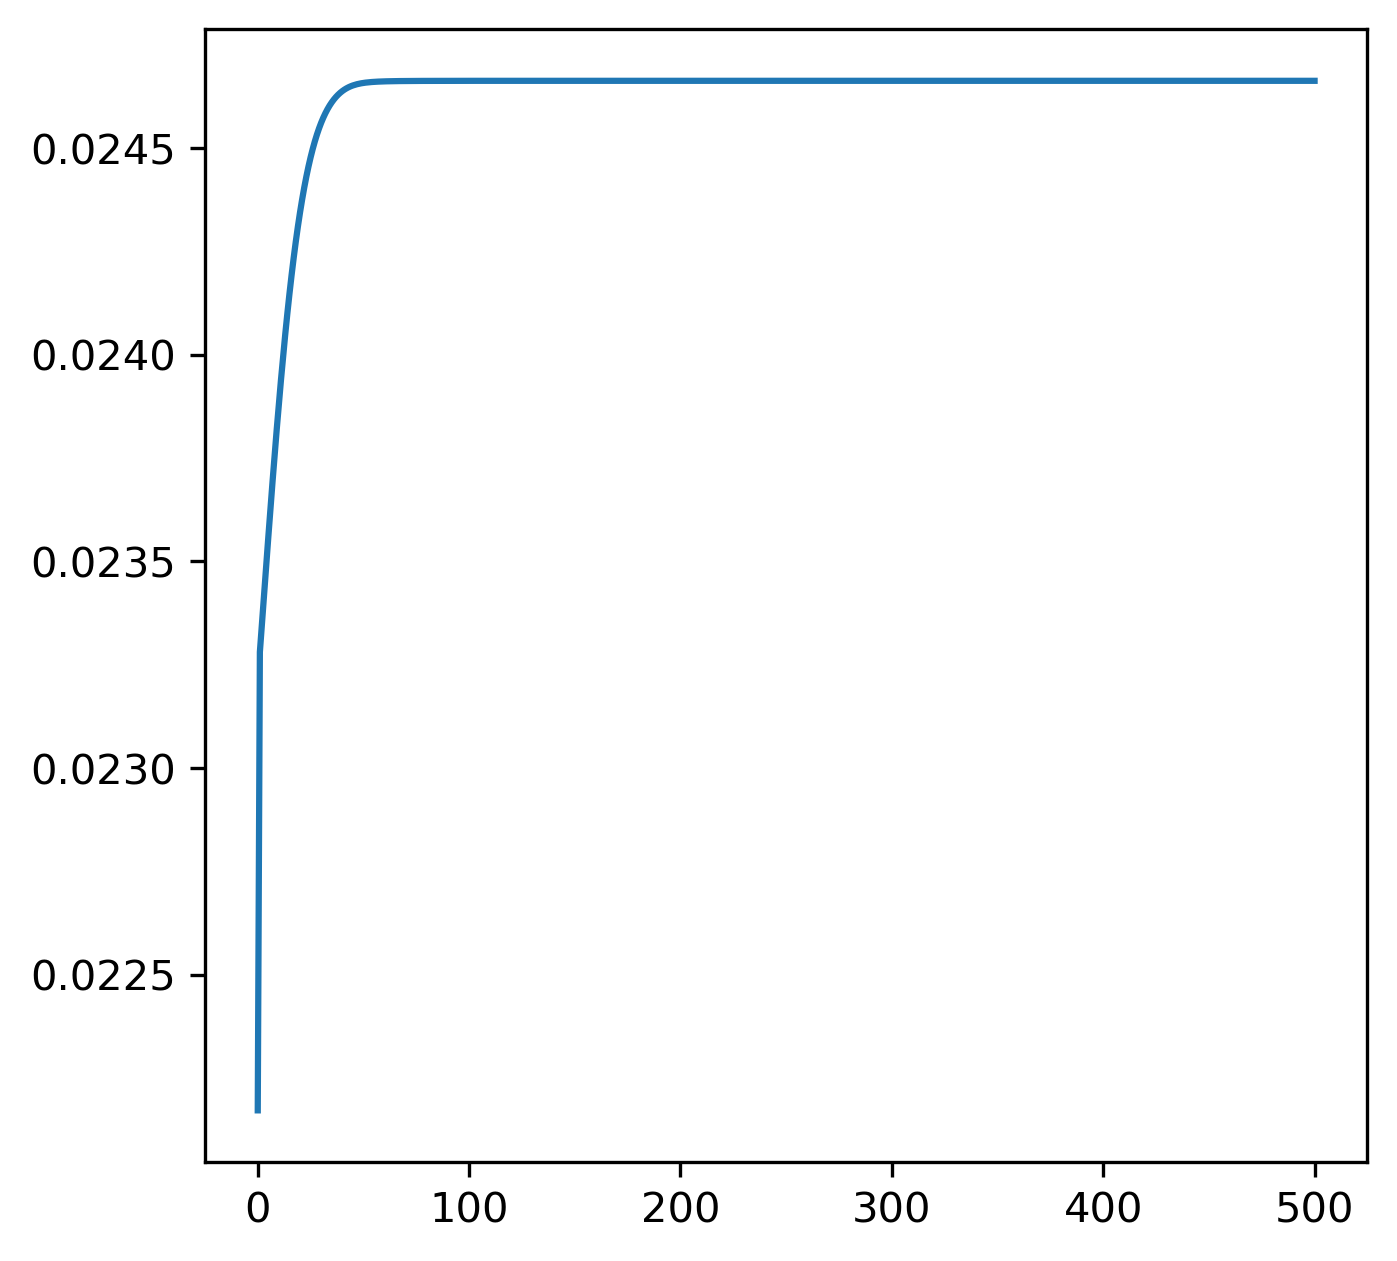

In [9]:
fig,ax=plt.subplots(figsize=(5,5),dpi=300)

Num=100
D=np.random.rand(Num)

midx=np.where(D==np.max(D))
D[midx]

# ax.plot(D,'*')
# ax.scatter(midx,D[midx],marker="o",s=200,c='none',edgecolor='red')
# ax.plot(midx,D[midx],marker="o",ms=100,c='none',markeredgecolor='red')
day=500
D,cas,ds=factory_gen(D,Num,days=day,exp=1.83,back=False)
# ax.plot(cas)
# ax.plot(1.1**np.arange(0,100,1)*cas[0])


# ax.plot(np.array(ds)[:,midx[0]])
ax.plot(ds)

plt.show()

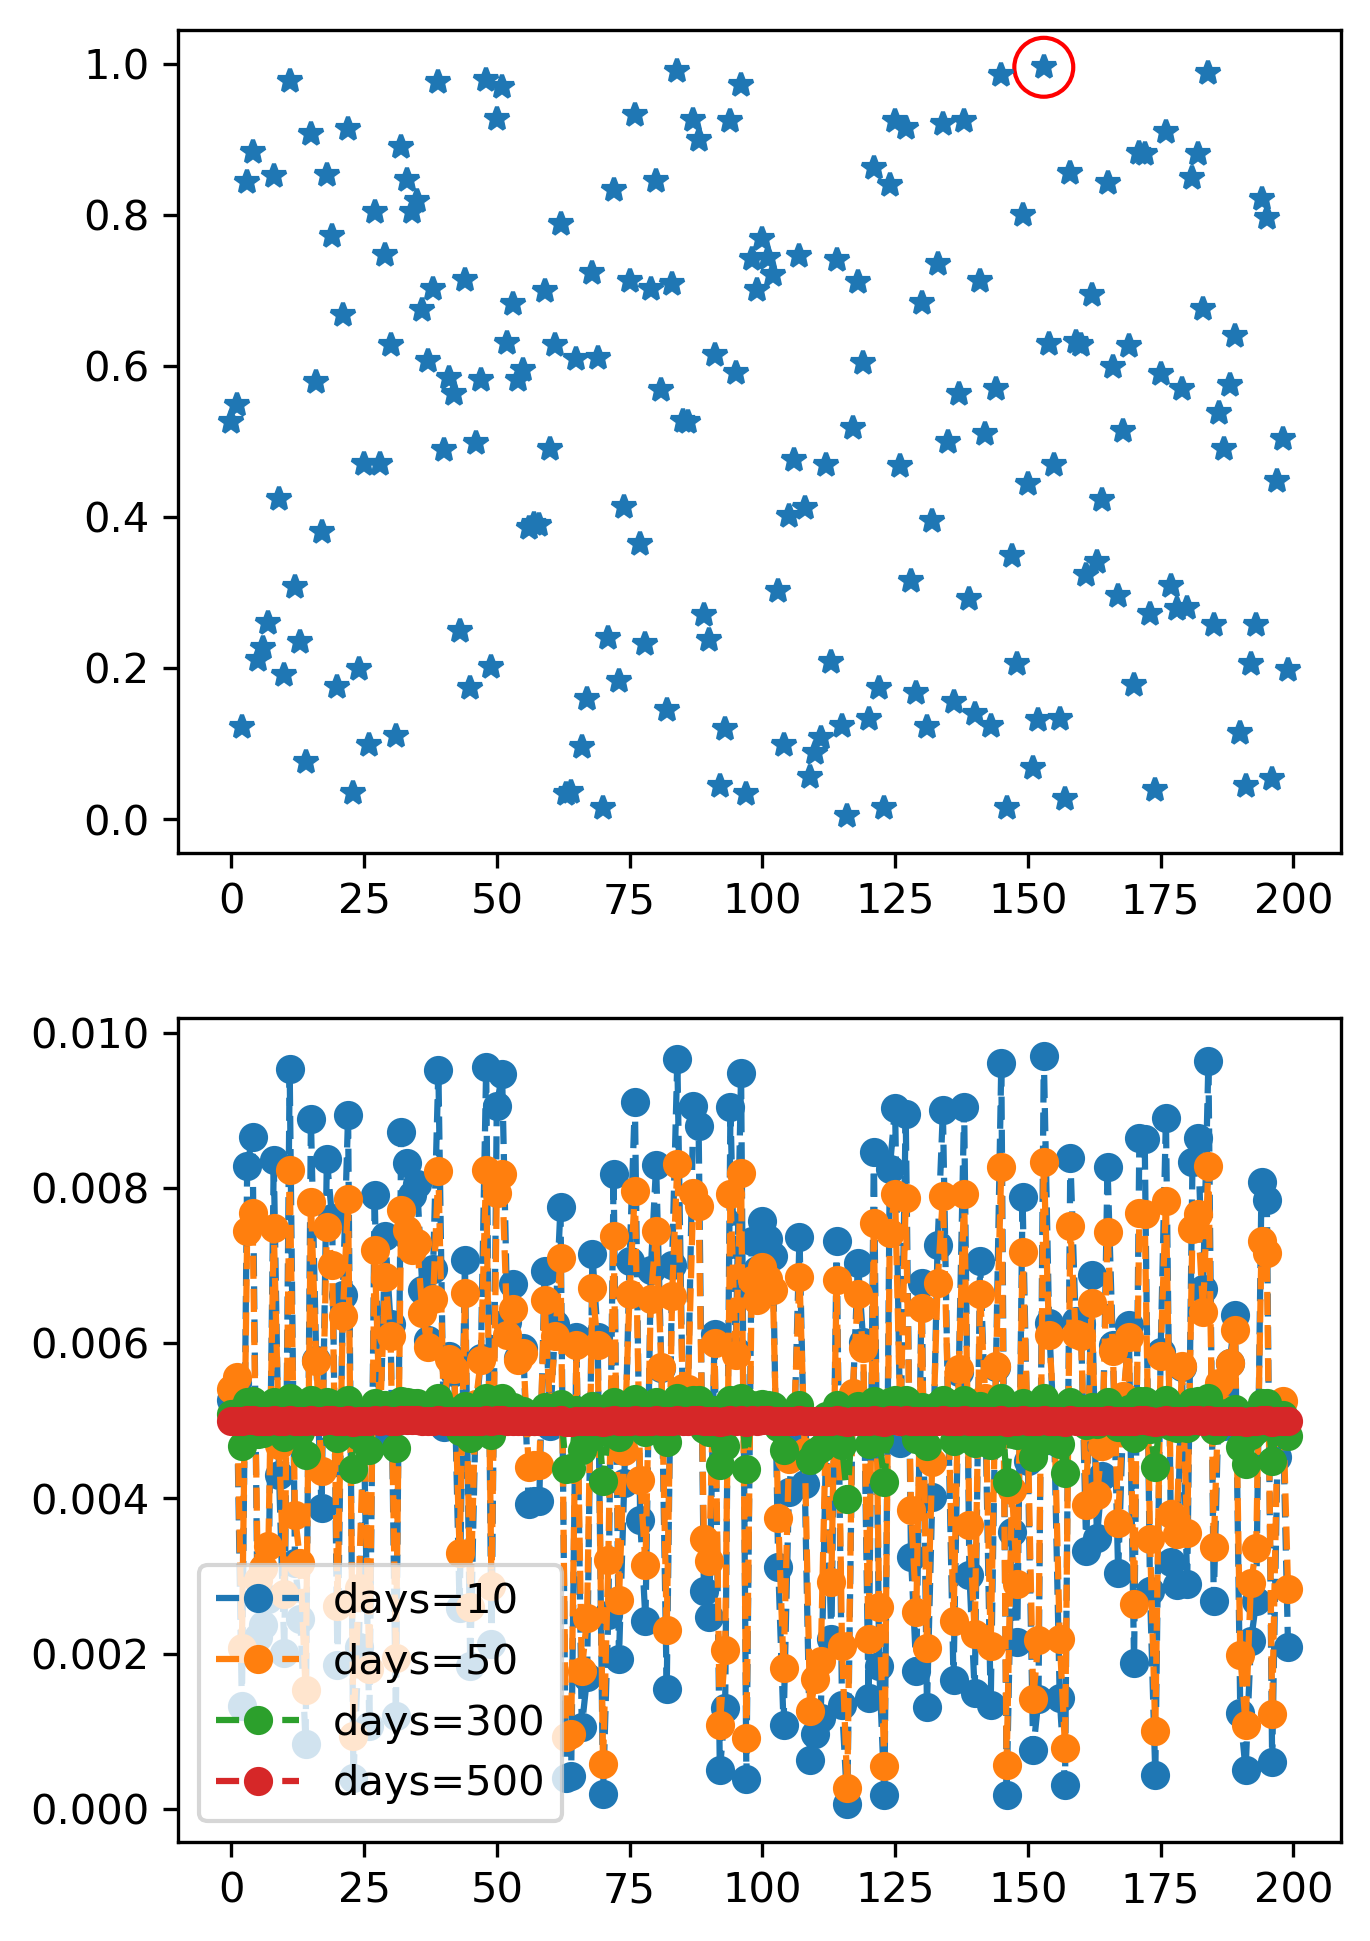

In [8]:
fig,axs=plt.subplots(2,1,figsize=(5,8),dpi=300)

Num=200
D=np.random.rand(Num)

midx=np.where(D==np.max(D))
D[midx]

ax=axs[0]
ax.plot(D,'*')
ax.scatter(midx,D[midx],marker="o",s=200,c='none',edgecolor='red')
# ax.plot(midx,D[midx],marker="o",ms=100,c='none',markeredgecolor='red')


ax=axs[1]

for day in [10,50,300,500]:
    D=factory_gen(D,Num,days=day,exp=0.91)
    ax.plot(D/D.sum(),'o--',label='days=%d'%day)
ax.legend()

# ax.set_xbound([-1,20])

plt.show()

## Boucnaud Pyhsica A

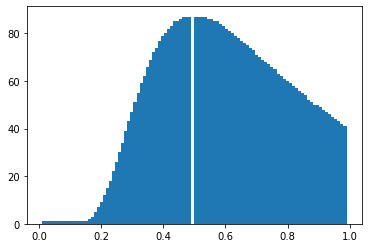

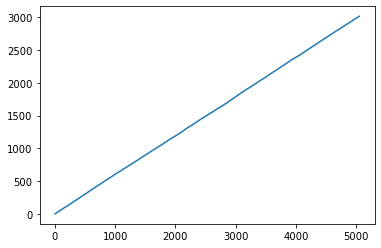

In [109]:
miu=3
# miu=0.5
w=np.arange(0.01,1,0.01)
ws=[]
for i in w:
    ws+=[np.exp(-(miu-1)/i)/i**(1+miu)]
    # ws.append(np.exp(-(miu-1)/i)/i**(1+miu))

ws=np.array(ws)/np.sum(ws)*5000
wii=[]

for i in range(len(w)):
    for j in range(int(ws[i]+1)):
        wii+=[w[i]]

plt.figure()
# plt.plot(np.cumsum(wii))
plt.hist(wii,bins=100)
plt.show()

np.random.shuffle(wii)
len(wii),np.cumsum(wii)
plt.figure()
plt.plot(np.cumsum(wii))
# plt.hist(wii,bins=100)
plt.show()


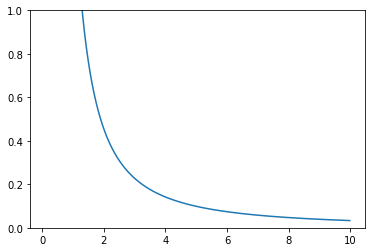

In [35]:
w=np.arange(0.1,10,0.01)
miu=3
miu=0.5
peq=np.exp(-(miu-1)/w)/w**(1+miu)

plt.figure()
plt.plot(w,peq)
# plt.hist(peq,bins=100)
plt.ylim([0,1])
plt.show()


## PNAS 2017

In [1]:
def gini(x, w=None):
    # The rest of the code requires numpy arrays.
    x = np.asarray(x)
    if w is not None:
        w = np.asarray(w)
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_w = w[sorted_indices]
        # Force float dtype to avoid overflows
        cumw = np.cumsum(sorted_w, dtype=float)
        cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
        return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
    else:
        sorted_x = np.sort(x)
        n = len(x)
        cumx = np.cumsum(sorted_x, dtype=float)
        # The above formula, with all weights equal to 1 simplifies to:
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

In [89]:
ws = np.ones(10000)
s = 1e-5
ginis = []
allweath=[]
for t in range(2000):
    ri = np.random.normal(0.05, 0.05, size=len(ws))
    ut = (s*len(ws)+(ri*ws).sum())/(ws.sum())
    ws = ws + ri*ws +s-ut * ws - 0.05 * ws ** 2
    if t % 50 == 0:
        # print("sum=%.1f,max=%.1f,min=%.1f,gini=%.1f"%(ws.sum(),ws.max(),ws.min(),gini(ws)),end='\t')
        allweath += [ws]
        ginis += [gini(ws)]
aw=np.array(allweath)


In [100]:
aw.mean(axis=0)

array([0.05092664, 0.05515454, 0.07265855, ..., 0.04749328, 0.04976169,
       0.04076334])

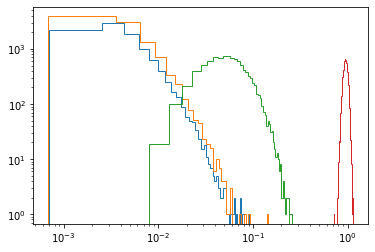

In [97]:
plt.figure()
# plt.plot(ws,'o-')
plt.hist(ws,bins=50,histtype='step')
plt.hist(aw[-1,:],bins=50,histtype='step')
plt.hist(aw[-35,:],bins=50,histtype='step')
plt.hist(aw[-40,:],bins=50,histtype='step')
# plt.hist(aw[-20,:],bins=50)
plt.yscale('log')
plt.xscale('log')
plt.show()


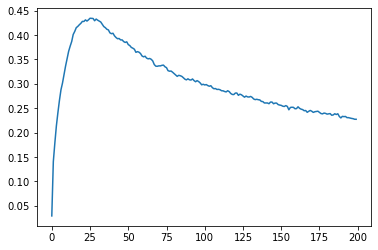

In [77]:
fig, ax = plt.subplots()
ax.plot(ginis)

plt.show()
